In [67]:
from csv_diff import load_csv, compare
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
PA = pd.read_csv('Files/CR-studentexperiences.csv', header = 1)

**Q1** Will the time taken for the users to enter a set of characters using Character Recorder be roughly the same as the time taken using Excel?

In [3]:
EX = pd.to_datetime(PA["end.1"][1:]) - pd.to_datetime(PA["start.1"][1:])
CR = pd.to_datetime(PA["end.2"][1:]) - pd.to_datetime(PA["start.2"][1:])

Timedelta('0 days 00:07:09.181818181')

<AxesSubplot:ylabel='Frequency'>

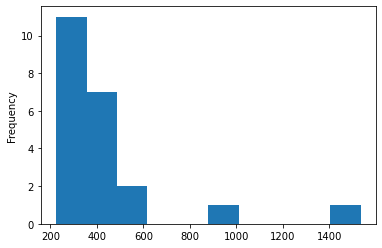

In [54]:
EX.mean()
EX.astype('timedelta64[s]').plot.hist()

Timedelta('0 days 00:12:50.181818181')

<AxesSubplot:ylabel='Frequency'>

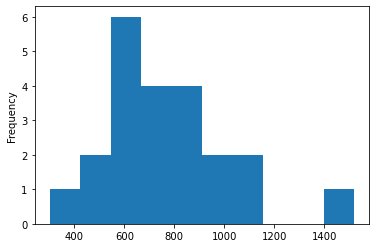

In [55]:
CR.mean()
CR.astype('timedelta64[s]').plot.hist()

We find out that the main value can not represent the user's time spent on the software based on the graph. So we will keep using the Box chart to explore more information. 

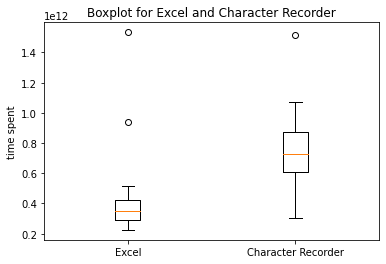

In [31]:
data_1 = EX
data_2 = CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["Excel", "Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.show()


After we look through Boxplot, we find out that there are two outliers in EX and one in CR. So, in the next step, We will remove those outliers and get their mean and median time.

In [37]:
def outlier_remove(col):

    mid = col.quantile(0.75) - col.quantile(0.25)

    top = col.quantile(0.75) + 1.5 * mid
    bot = col.quantile(0.25) - 1.5 * mid

    def remove(x):
        if x <= top and x >= bot:
            return x

    return col.map(remove)

In [48]:
New_CR = outlier_remove(CR).dropna()
New_EX = outlier_remove(EX).dropna()

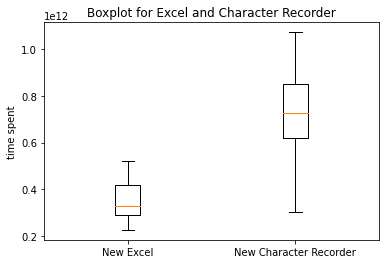

In [50]:
data_1 = New_EX
data_2 = New_CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["New Excel", "New Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.show()

In [60]:
print('Excel Median time spent : ' + str(New_EX.median()))
print('Excel Mean time spent : ' +  str(New_EX.mean()))

Median time spent : 0 days 00:05:26.500000
Mean time spent : 0 days 00:05:48.300000


In [61]:
print('Character Recorder Median time spent : ' + str(New_CR.median()))
print('Character Recorder Mean time spent : ' +  str(New_CR.mean()))

Character Recorder Median time spent : 0 days 00:12:09
Character Recorder Mean time spent : 0 days 00:12:14.523809523


After we delete outlier, we will get the t-test result

In [69]:
stats.ttest_rel(EX, CR)

Ttest_relResult(statistic=-1.000000850339776, pvalue=0.3281828595440006)

**Q2** Will the data entered using Character Recorder be more consistent than the data entered using Excel? 

**Q3** Will the user add new terms to the ontology while using Character Recorder? If so, how often?

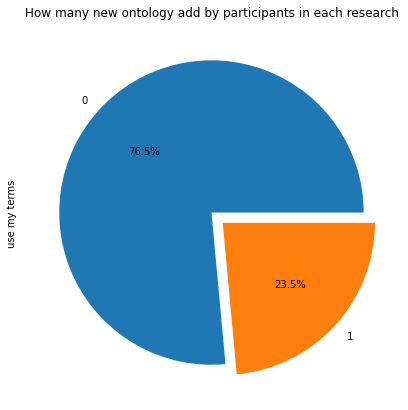

In [8]:
plt.figure(figsize=[9,7])
PA["use my terms"][1:].dropna().value_counts().plot.pie(explode = (0, 0.1), autopct='%1.1f%%')
plt.title("How many new ontology add by participants in each research")
plt.show()

**Q4** Will the terms added by different users to the ontology create conflicts in the ontology? If so, what kinds of conflict? and what are their relative frequency? 

**Q5** Will the user find the software intuitive to use and instructions clear and easy to follow?